# Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии. 

Для проведения анализа я выбрала датасет о музыке: https://www.kaggle.com/datasets/purumalgi/music-genre-classification?select=train.csv 

Мы будем решать задачу по разработке системы рекомендаций музыкального сервиса, что является актуальным в наше время, учитывая развитие таких технологий, как "Моя волна" в Яндекс.Музыке и Плейлисты дня в музыке ВК. 

Датасет состоит из трех файлов:

submission.csv - подчиненная выборка с уже отклассифицированным набором данных
test.csv - тестовая выборка
train.csv - обучающая выборка


Наша работа будет проводиться с test и train файлами. 
Каждый файл содержит следующие колонки:

Artist Name - имя певца  

Track Name - название трека

Popularity - популярность трека в %

danceability - оценка того, насколько трек подходит для танцев в значении от 0 до 1 

energy - энергичность трека в значении от 0 до 1 

key - значимость трека в значении от 1 до 11 

loudness - оценка громкости трека 

mode - тип трека (Explicite content или нет )

speechiness - содержание текста в треке от 0 до 1 

acousticness - содержание музыки в треке от 0 до 1 

instrumentalness - содержание инструментов в треке от 0 до 1 

liveness - живость исполнения от 0 до 1 

valence - валентность трека от 0 до 1 

tempo - ритмичность в bpm

duration_in min/ms - длительность трека

time_signature - временная подпись 


Для рассматриваемого набора данных будем решать задачу классификации по жанрам 'Class’: Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Instrumental, Country, Bollywood,

# Загрузка данных


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [ ]:
# Обучающая выборка
train = pd.read_csv('/content/train.csv')
# Тестовая выборка и подчиненная выборка
test = pd.read_csv('/content/test.csv.xls')
submission = pd.read_csv('/content/submission.csv.xls')

In [ ]:
# Удалим дубликаты записей, если они присутствуют
train = train.drop_duplicates()
test = test.drop_duplicates()
submission = submission.drop_duplicates()

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
Основные характеристики датасетов

In [ ]:
# Первые 5 строк датасета
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
# Первые 5 строк датасета
test.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


In [ ]:
submission.head()

,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Размеры датасетов
train.shape, test.shape, submission.shape

((17996, 17), (7388, 16), (12, 11))

In [ ]:
# Список колонок
train.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [ ]:
# Список колонок с типами данных 
# убедимся что типы данных одинаковы в обучающей и тестовых выборках
train.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

In [ ]:
test.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
dtype: object

В обучающей выборке есть колонка Class, а в тестовой ее нет. Расшифровка этой колонки есть в файле submission. Посмотрим его:

In [ ]:
submission.dtypes

Acoustic/Folk_0    int64
Alt_Music_1        int64
Blues_2            int64
Bollywood_3        int64
Country_4          int64
HipHop_5           int64
Indie Alt_6        int64
Instrumental_7     int64
Metal_8            int64
Pop_9              int64
Rock_10            int64
dtype: object

In [ ]:
# Проверим наличие пустых значений
train.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
test.isnull().sum()

Artist Name              0
Track Name               0
Popularity             220
danceability             0
energy                   0
key                    777
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1858
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

In [ ]:
submission.isnull().sum()

Acoustic/Folk_0    0
Alt_Music_1        0
Blues_2            0
Bollywood_3        0
Country_4          0
HipHop_5           0
Indie Alt_6        0
Instrumental_7     0
Metal_8            0
Pop_9              0
Rock_10            0
dtype: int64

Вывод: в обучающей и тестовых выборках есть пропущенные значения. Избавимся от них: 

В стлолбце key соержится несовсем ясная информация, поэтому мы можем удалить его. Также удалим столбец инструментальности трека, так как для анализа достаточно других показателей. 

In [ ]:
train = train.drop(columns='key') 
train = train.drop(columns='instrumentalness') 
(train.shape, train.shape)
train.isna().sum()

Artist Name             0
Track Name              0
Popularity            428
danceability            0
energy                  0
loudness                0
mode                    0
speechiness             0
acousticness            0
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
Class                   0
dtype: int64

In [ ]:
test = test.drop(columns='key') 
test = test.drop(columns='instrumentalness') 
(test.shape, test.shape)
test.isna().sum()

Artist Name             0
Track Name              0
Popularity            220
danceability            0
energy                  0
loudness                0
mode                    0
speechiness             0
acousticness            0
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

Посмотрим значения популярности. 

In [ ]:
def get_columns_with_null_numbers(data):
    num_cols = []
    for col in data.columns:
        # Количество пустых значений
        temp_null_count = data[data[col].isnull()].shape[0]
        total_count = data.shape[0]
        dt = str(data[col].dtype)
        if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
            num_cols.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            print(
                f'''Колонка {col}. Тип данных {dt}. Количество пустых значений {temp_null_count}, {temp_perc}%.''')
    return num_cols

data_num = train[get_columns_with_null_numbers(train)]
data_num.head()

Колонка Popularity. Тип данных float64. Количество пустых значений 428, 2.38%.


,Popularity
0,60.0
1,54.0
2,35.0
3,66.0
4,53.0


Колонка Popularity. Тип данных float64. Количество пустых значений 428, 2.38%.


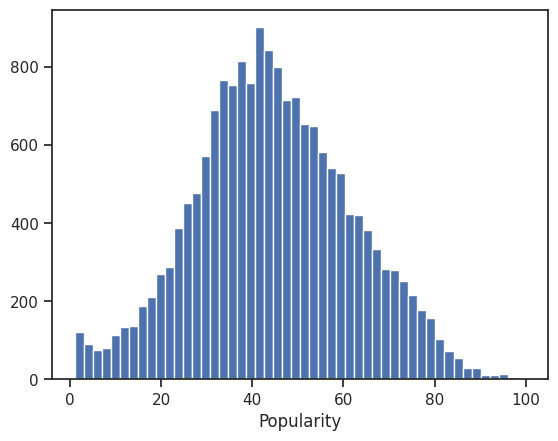

In [ ]:
col = get_columns_with_null_numbers(train)
for col in data_num:
    plt.hist(train[col], 50)
    plt.xlabel(col)
    plt.show()


In [ ]:
# Так как пустых значений всего 2.38% от выборки, удалим эти строки. 

train = train.dropna(axis=0, how='any')
train.isna().sum()


Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
test = test.dropna(axis=0, how='any')
test.isna().sum()


Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

Болше нулевых значений в выборках нет. 

Построение графиков для понимания структуры данных

In [ ]:
# Парные диаграммы
# sns.pairplot(train)

In [ ]:
# sns.pairplot(train, hue="mode")

In [ ]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
train['mode'].unique()

array([1, 0])

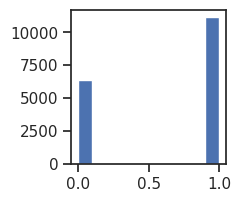

In [ ]:
# Оценим дисбаланс классов 
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['mode'])
plt.show()

In [ ]:
train['mode'].value_counts()

1    11164
0     6404
Name: mode, dtype: int64

In [ ]:
# посчитаем дисбаланс классов
total = train.shape[0]
class_0, class_1 = train['mode'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 63.55%, а класс 1 составляет 36.449999999999996%.


Вывод: дисбаланс небольшой - приемлемо. 

In [ ]:
train.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

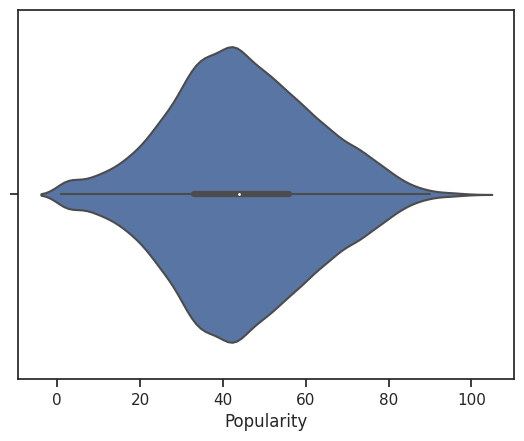

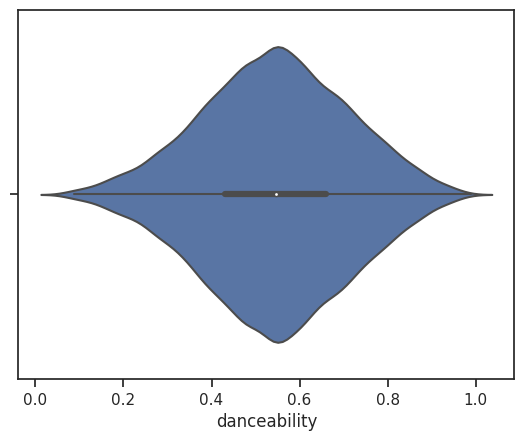

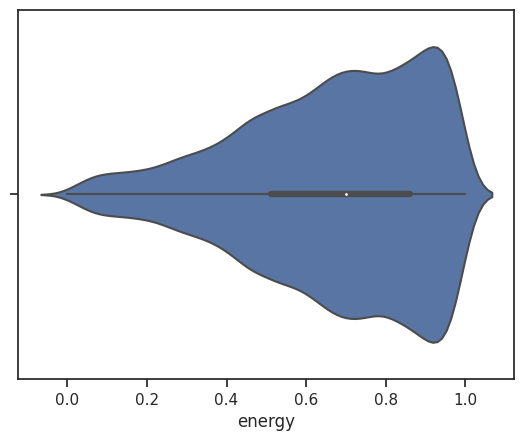

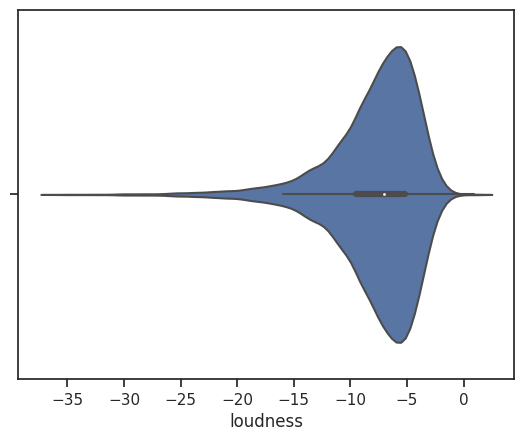

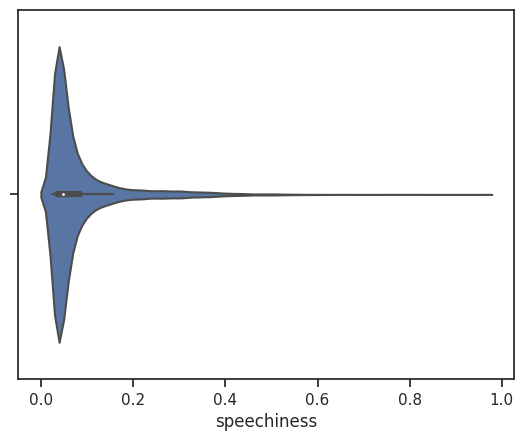

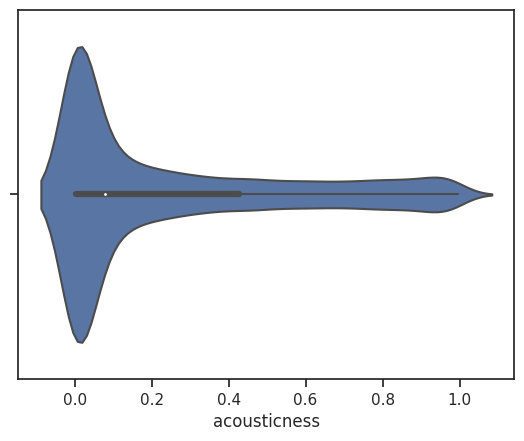

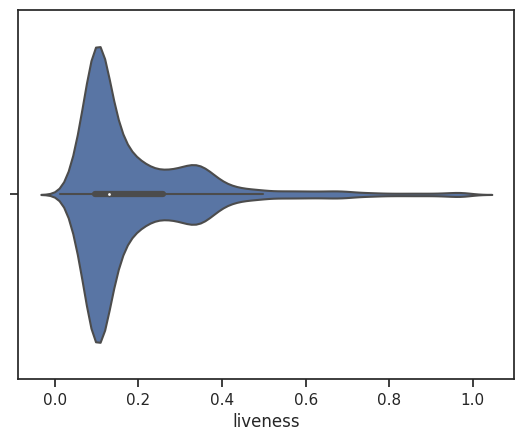

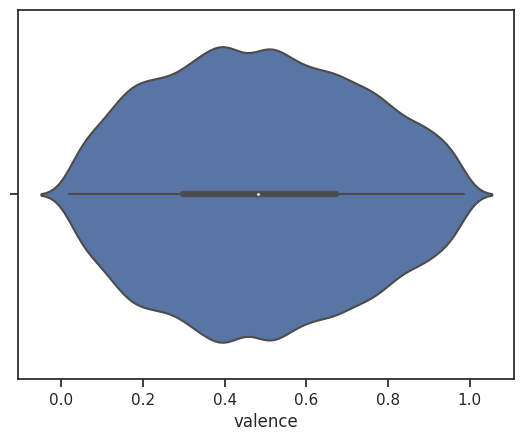

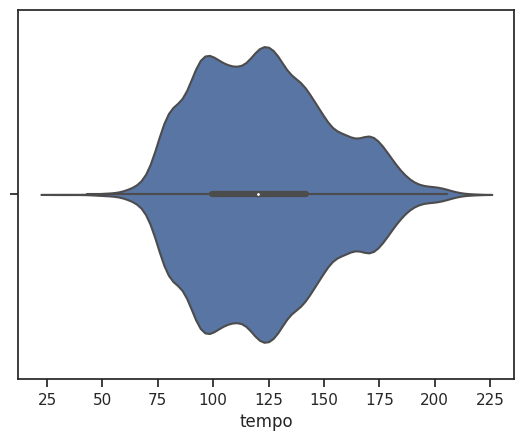

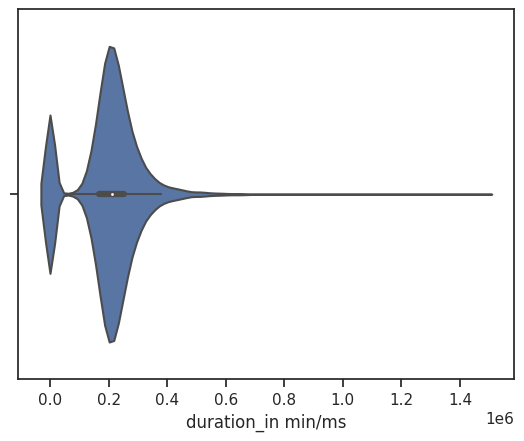

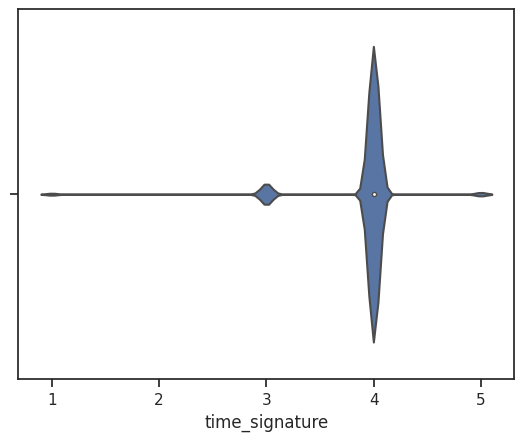

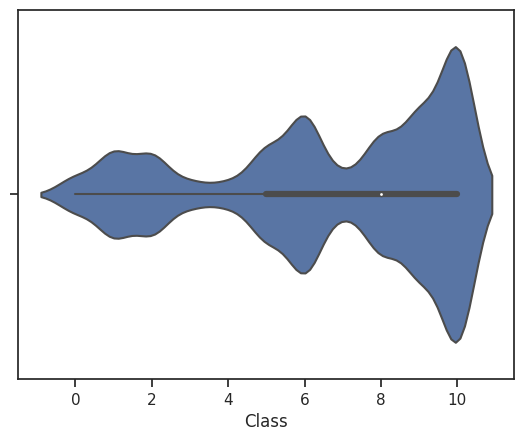

In [ ]:
# Скрипичные диаграммы для числовых колонок
for col in ['Popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class']:
    sns.violinplot(x=train[col])
    plt.show()

# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [ ]:
train.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

Для построения моделей будем использовать все признаки. 

Категориальные признаки отсутствуют, их кодирования не требуется. Исключением является признак Class, но в представленном датасете он уже закодирован в отдельном файле submission.csv. 

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним масштабирование данных. Для этого необходимо объединить обучающую и тестовые выборки.

In [ ]:
# Создадим вспомогательные колонки, 
# чтобы наборы данных можно было разделить.
train['dataset'] = 'TRAIN'
test['dataset'] = 'TEST'

In [ ]:
# Колонки для объединения
join_cols = ['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'dataset']

In [ ]:
data_all = pd.concat([train[join_cols], test[join_cols]])

In [ ]:
# Проверим корректность объединения
assert data_all.shape[0] == train.shape[0]+test.shape[0]

In [ ]:
data_all.head()

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,dataset
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,TRAIN
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,TRAIN
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,TRAIN
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,TRAIN
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,TRAIN


In [ ]:
# Числовые колонки для масштабирования
scale_cols = ['Popularity', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature']

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_all[scale_cols])

In [ ]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_all[new_col_name] = sc1_data[:,i]

In [ ]:
data_all.head()

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,...,energy_scaled,loudness_scaled,mode_scaled,speechiness_scaled,acousticness_scaled,liveness_scaled,valence_scaled,tempo_scaled,duration_in min/ms_scaled,time_signature_scaled
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,...,0.563991,0.833267,1.0,0.027733,0.017169,0.073879,0.911765,0.472924,0.150273,0.75
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,...,0.813996,0.773477,1.0,0.019307,0.001104,0.090173,0.577079,0.392437,0.161250,0.75
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,...,0.613992,0.744347,1.0,0.032000,0.487952,0.386702,0.798174,0.535104,0.070248,0.75
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,...,0.596992,0.792000,0.0,0.035200,0.021285,0.111426,0.577079,0.349395,0.111437,0.75
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,...,0.974999,0.851342,1.0,0.206400,0.000170,0.162028,0.093103,0.769838,0.147303,0.75


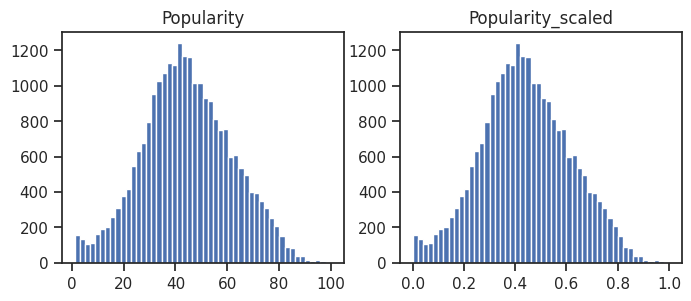

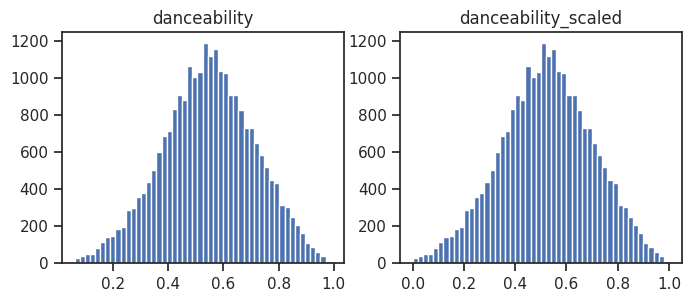

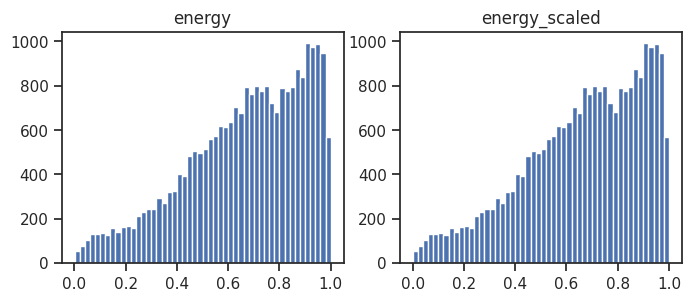

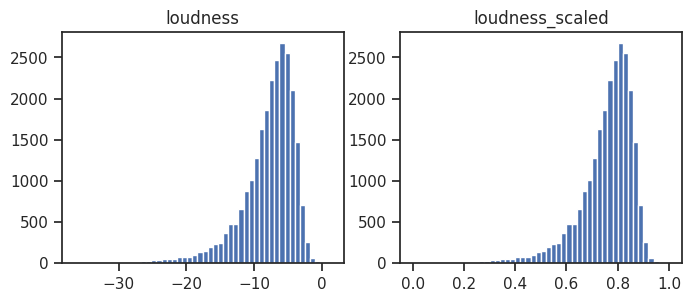

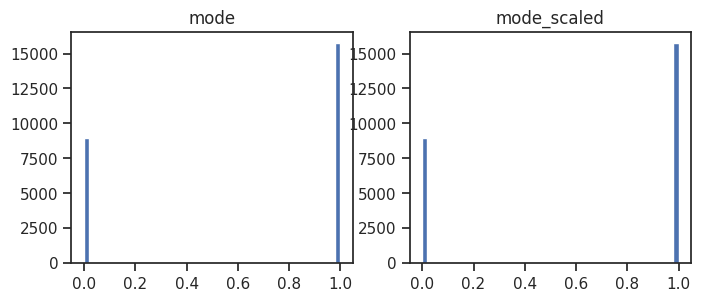

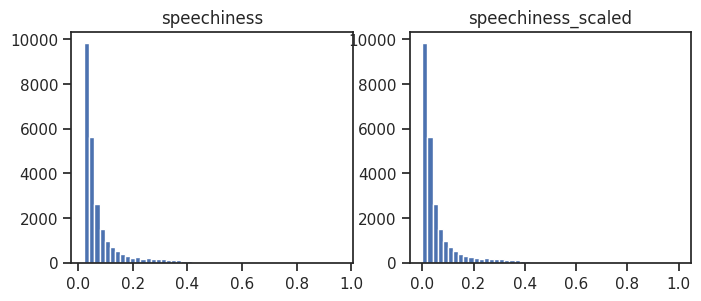

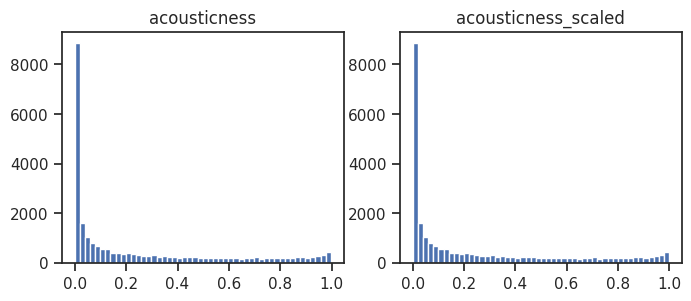

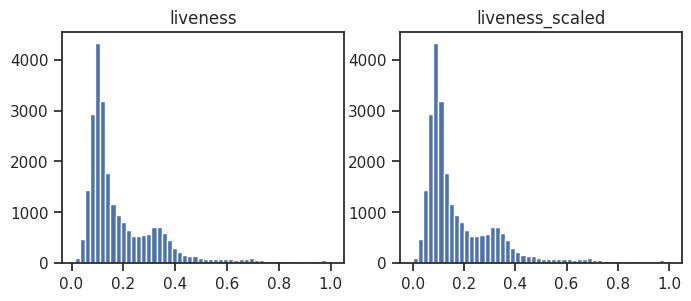

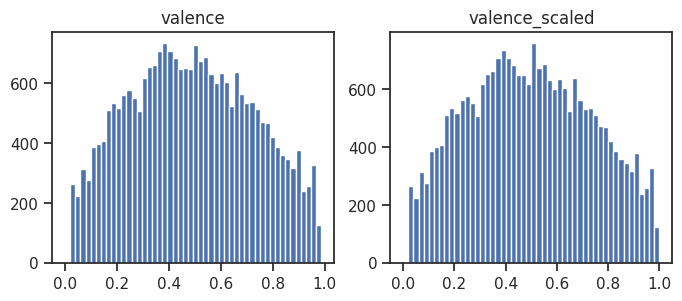

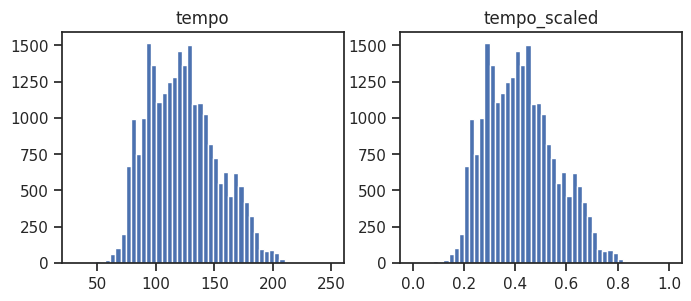

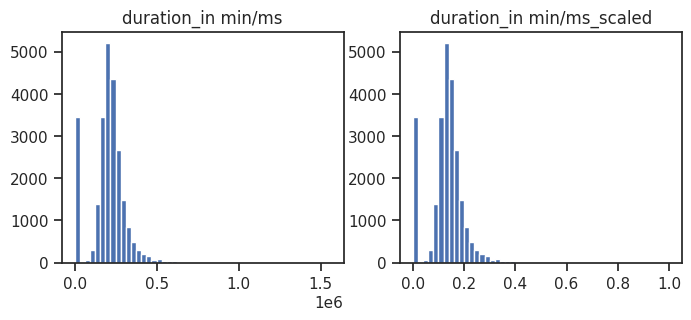

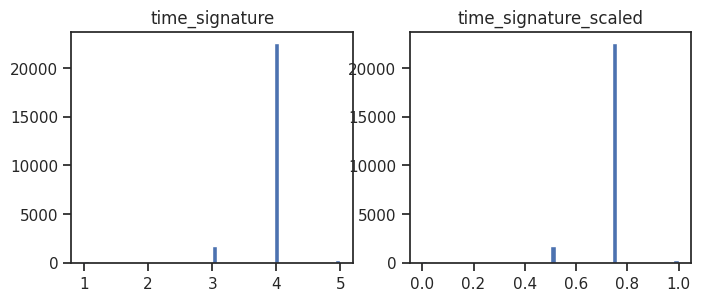

In [ ]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_all[col], 50)
    ax[1].hist(data_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [ ]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols + ['mode']
corr_cols_1

['Popularity',
 'danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature',
 'mode']

In [ ]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['mode']
corr_cols_2

['Popularity_scaled',
 'danceability_scaled',
 'energy_scaled',
 'loudness_scaled',
 'mode_scaled',
 'speechiness_scaled',
 'acousticness_scaled',
 'liveness_scaled',
 'valence_scaled',
 'tempo_scaled',
 'duration_in min/ms_scaled',
 'time_signature_scaled',
 'mode']

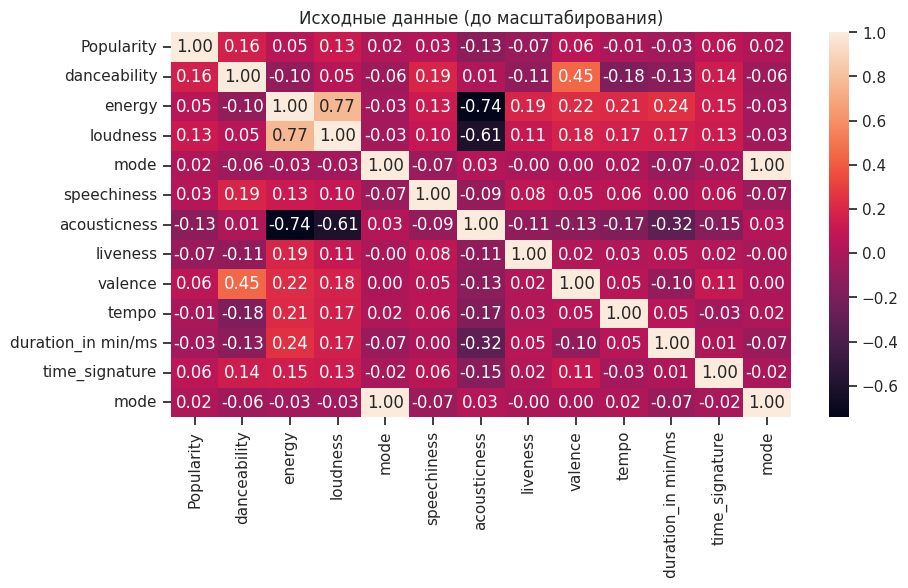

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_all[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

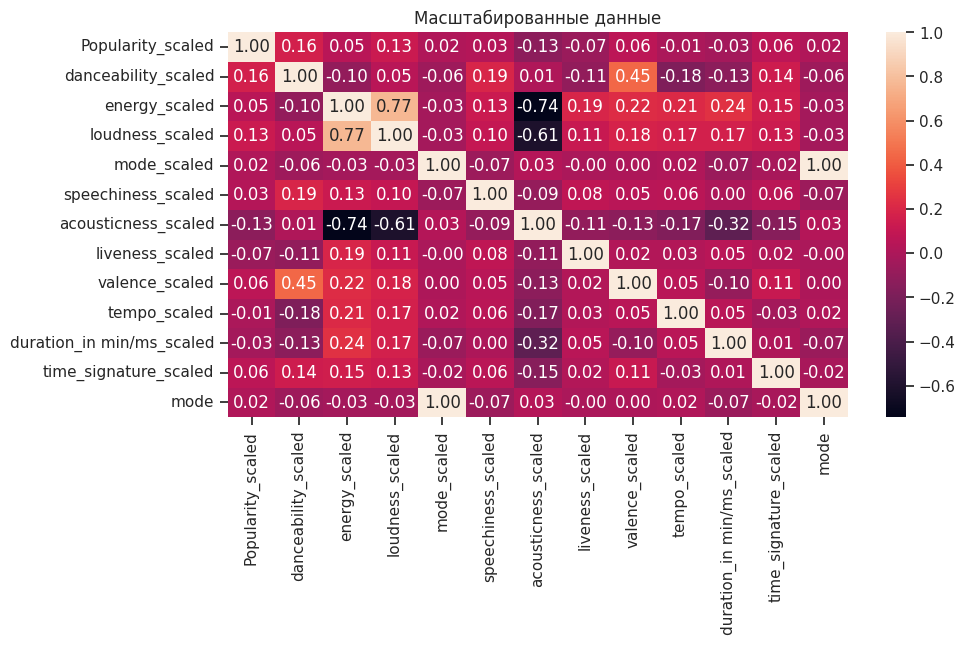

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_all[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.

- Целевой признак классификации "mode" ни с чем не коррелирует, поэтому необходимо выбрать другой признак, так как иначе мы не сможем построить модели обучения. 

Выбор метрик для последующей оценки качества моделей.
В качестве метрик для решения задачи классификации будем использовать:

Метрики, формируемые на основе матрицы ошибок:

Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция precision_score.

# Бэггинг 

In [ ]:
# Разделим выборку 
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('/content/train.csv')
train, test = train_test_split(dataset, test_size=0.33, random_state=42)

In [ ]:
train.shape

(12057, 17)

In [ ]:
test.shape

(5939, 17)

In [ ]:
from sklearn.ensemble import BaggingClassifier

bc1 = BaggingClassifier(n_estimators=3, oob_score=True, random_state=10)
bc1.fit(train[["Popularity", "energy"]], train["Class"])

ValueError: ignored

In [ ]:
# Объекты, использованные в обучающей выборке каждого дерева:
bc1.estimators_samples_

[array([ 3508,   138,  2814, ...,   312, 12510, 11276]),
 array([ 7775, 17198, 17245, ...,  1904, 10990,  1839]),
 array([14134,  2043,   643, ...,  9634, 12683,  1872])]

In [ ]:

# Построим бинарную матрицу, чтобы наглядно показать данные, попавшие в обучающую выборку. 1 = попадание в выборку
bin_array = np.zeros((3, train[["Popularity", "energy"]].shape[0]))
for i in range(3):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

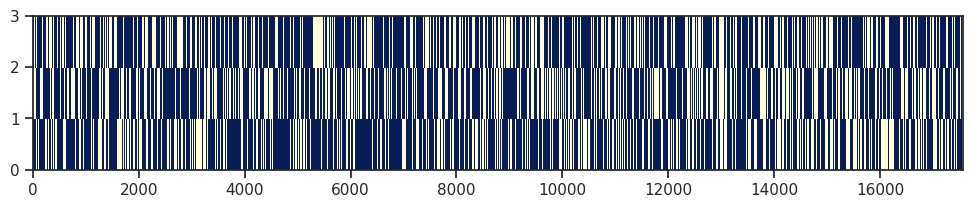

In [ ]:
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

# OUT OF BAG ERROR

In [ ]:
for i in range(3):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 36.57%
Для модели № 2 размер OOB составляет 36.67%
Для модели № 3 размер OOB составляет 37.19%


In [ ]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

In [ ]:
# Параметр oob_decision_function_ возвращает вероятности 
# принадлежности объекта к классам на основе oob
# В данном примере три класса, 
# значения nan могут возвращаться в случае маленькой выборки
bc1.oob_decision_function_[55:70]

array([[0.        , 0.        , 0.73333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26666667],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,   

Визуализация обученных деревьев

In [ ]:
from sklearn import tree

tree.plot_tree(bc1.estimators_[0]) 

[Text(0.593533272930682, 0.9871794871794872, 'x[1] <= 0.848\ngini = 0.853\nsamples = 11143\nvalue = [568, 1325, 1338, 365, 356, 1405, 2568, 528, 1858\n2477, 4780]'),
 Text(0.27043495686835556, 0.9615384615384616, 'x[1] <= 0.223\ngini = 0.862\nsamples = 8126\nvalue = [562, 980, 1161, 343, 308, 1277, 2021, 528, 506, 2154\n2991]'),
 Text(0.020326770922390443, 0.9358974358974359, 'x[1] <= 0.102\ngini = 0.752\nsamples = 612\nvalue = [75, 45, 105, 6, 15, 18, 119, 429, 8, 56, 82]'),
 Text(0.0033449222599410736, 0.9102564102564102, 'x[1] <= 0.013\ngini = 0.564\nsamples = 225\nvalue = [12, 23, 31, 1, 3, 8, 27, 220, 2, 6, 9]'),
 Text(0.000856621331544244, 0.8846153846153846, 'x[1] <= 0.01\ngini = 0.615\nsamples = 12\nvalue = [0, 8, 0, 0, 0, 0, 9, 3, 0, 0, 0]'),
 Text(0.0007138511096202034, 0.8589743589743589, 'x[1] <= 0.006\ngini = 0.462\nsamples = 9\nvalue = [0, 1, 0, 0, 0, 0, 9, 3, 0, 0, 0]'),
 Text(0.000428310665772122, 0.8333333333333334, 'x[0] <= 37.5\ngini = 0.198\nsamples = 5\nvalue = [0,

Error in callback <function flush_figures at 0x7f061033ca60> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
tree.plot_tree(bc1.estimators_[1]) 

In [ ]:
tree.plot_tree(bc1.estimators_[2]) 

In [ ]:
# Визуализация результатов классификации
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_cl(clf):
    title = clf.__repr__
    clf.fit(train[["Popularity", "energy"]], train[['Class']])
    fig, ax = plt.subplots(figsize=(5,5))
    X0 = train["Popularity"]
    X1 = train["energy"]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=train['Class'], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Popularity')
    ax.set_ylabel('energy')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


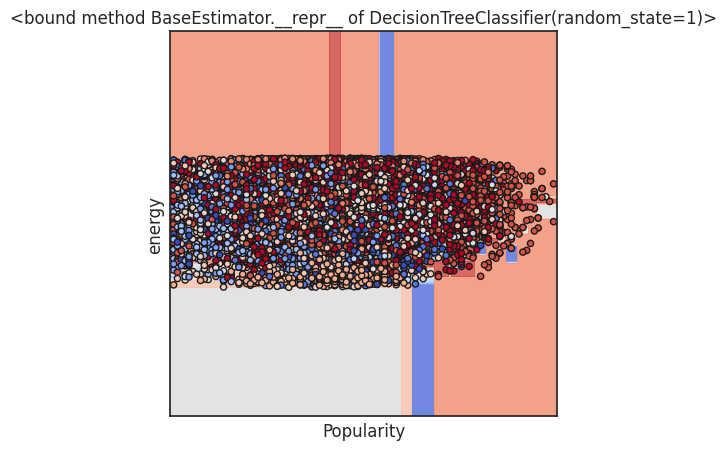

In [ ]:
plot_cl(DecisionTreeClassifier(random_state=1))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


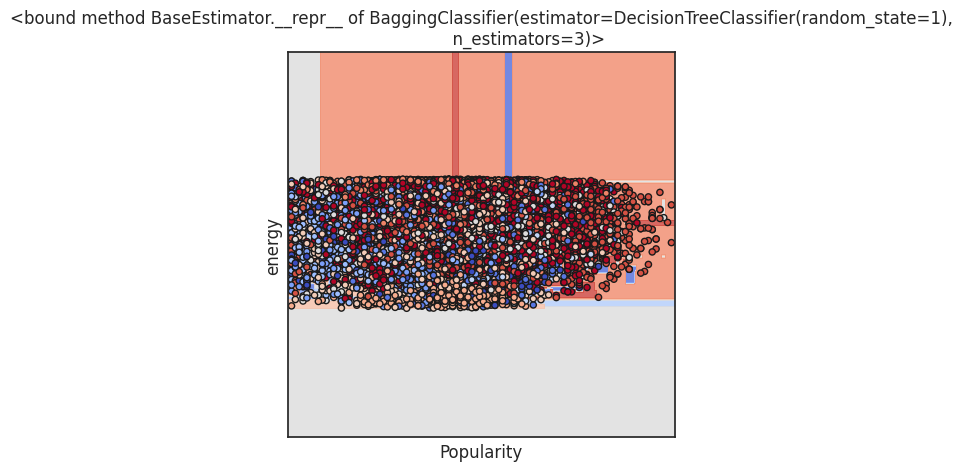

In [ ]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=3))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


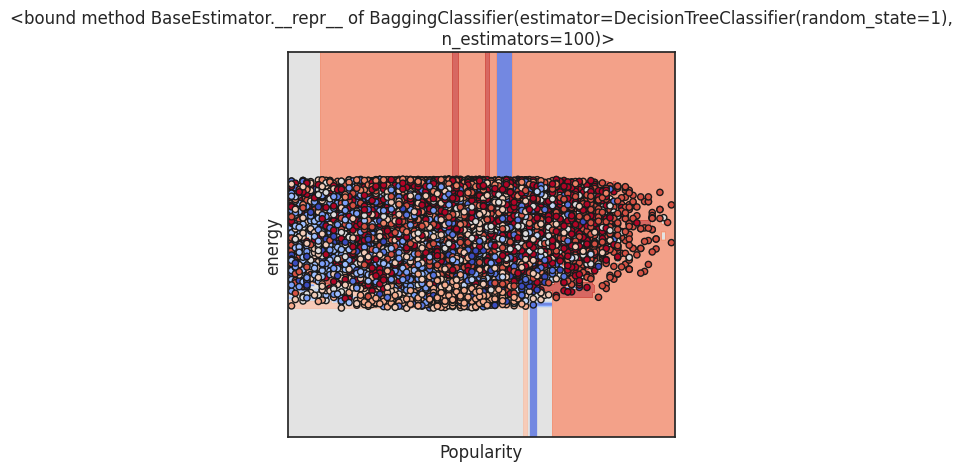

In [ ]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100))